# Categorical Plots in seaborn 

    - Statistical estimation within categories

    - Distribution within categories

### Categorical plots for Statistic within Categories
    - understanding plots & when to use them for statistics within categories
    - plots for displaying statistical metrics per category

    ------> eg- mean value per category, no. of rows per category etc

    - Two main type of plots for this -
     
     1. countplot() ---> counts no. of rows per category

     2. barplot() -----> general form that allows us to choose any metrics per category, i.e we can show mean per category or standard deviation per category or even both
    
##### NB - i.e we can think of this categorical statistic plots as the visualization equavalent to ***GoupBY method calls in pandas

In [1]:
# countplot()

# eg ---> count plot for corporate devisions where in Y-axis wehave no. of rows i.e count of tatal instances & in x-axis we have corporate division

#-----> NB - if we create count plots for categoris that have major differce as the count of instances between them then those low count may be unclear
            # unclear in the countplot, eg - 300 instance of high school & only 1 instance of masters etc

            #----> i.e in such cases we can report as table using grouby count method call


# Hue --> we can also add hue separation to show more than one category in countplot --> eg - count base of education & further devide it up by traing level 

                

In [2]:
# barplot()

#---> general form that allows us to choose any measure estimator for Y-axis

#---> i.e what we end up doing is inside method call we pass in numpy estimator function, eg - np.mean etc

#---> eg - we can plot out mean value & standard deviation per category


# NB -  we should careful doing Bar plot for displaying a mean or standard deviation
      #---> .ie since bar is filled & continuos , a viewer may inperpret continuity along Y-axis which may not be correct 
      #---> i.e it is recommended we add additional explaination & labelling for thiese sort of plots

      #----> i.e be very careful with general barplot which is showing filled continuity which can be misleading

#eg ---> height of the bar itself represent average mean salary value & the black line on top of the bar may represent a standard deviation

        # *But --> i.e color bar is fill from zero to average value


#NB --> since this barplot represent a single value (eg- mean) ,it is recommended we report it as table instead of showing barplot for it


#### NB ---> i.e, the purpose of making data visualization is to make the information easily digestible to viewer & not hard


In [1]:
# Categorical plots for statistics within categories

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns

In [2]:
df = pd.read_csv('dm_office_sales.csv')

df.head()

,division,level of education,training level,work experience,salary,sales
0,printers,some college,2,6,91684,372302
1,printers,associate's degree,2,10,119679,495660
2,peripherals,high school,0,9,82045,320453
3,office supplies,associate's degree,2,5,92949,377148
4,office supplies,high school,1,5,71280,312802


In [4]:
# count plot

df['division'].value_counts()  # ----> we can get value of count for each division category directly without countplot 

office supplies      252
printers             250
peripherals          243
computer hardware    159
computer software     96
Name: division, dtype: int64

<Axes: xlabel='division', ylabel='count'>

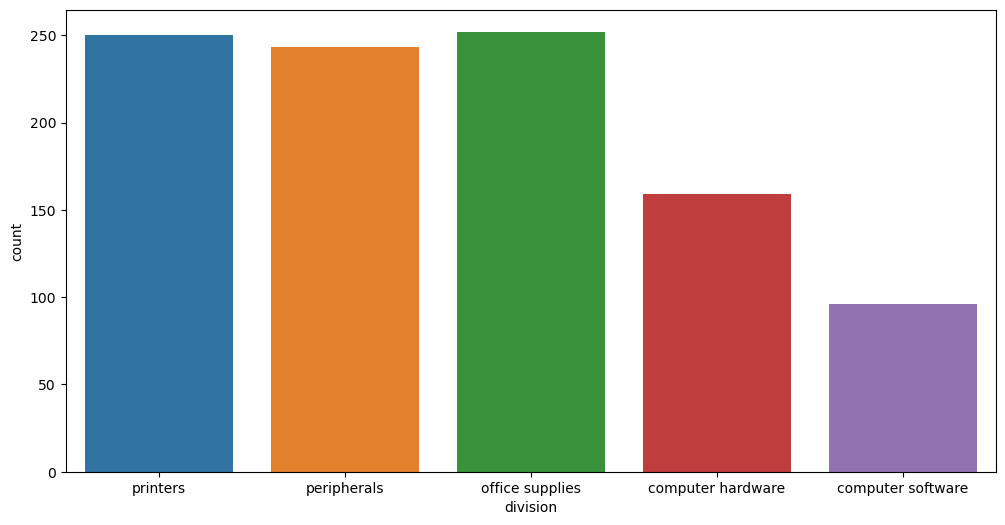

In [7]:
plt.figure(figsize=(12, 6)) #--> customize the size figure object canvas
 
sns.countplot(data=df, x='division') #---> countplot for division category in dataset

#---> this plot is same data we have in value coount table 

 #### --> we can see printer, peripheral supplies division have same number of employees 
 
 ###### Nb -- >   Y-axis starts at zero , i.e - we should not try to decieve somebody by having Y-limit start at another level that is not zero 
 
             eg --> setting y-lim start from  100 & thus showing empty count plot for computer division here etc
             
             
             # NB - we should be careful of displaying the infos correctly & in truthful manner ( which is easier to decieve someone by this kind of plot)               

<Axes: xlabel='level of education', ylabel='count'>

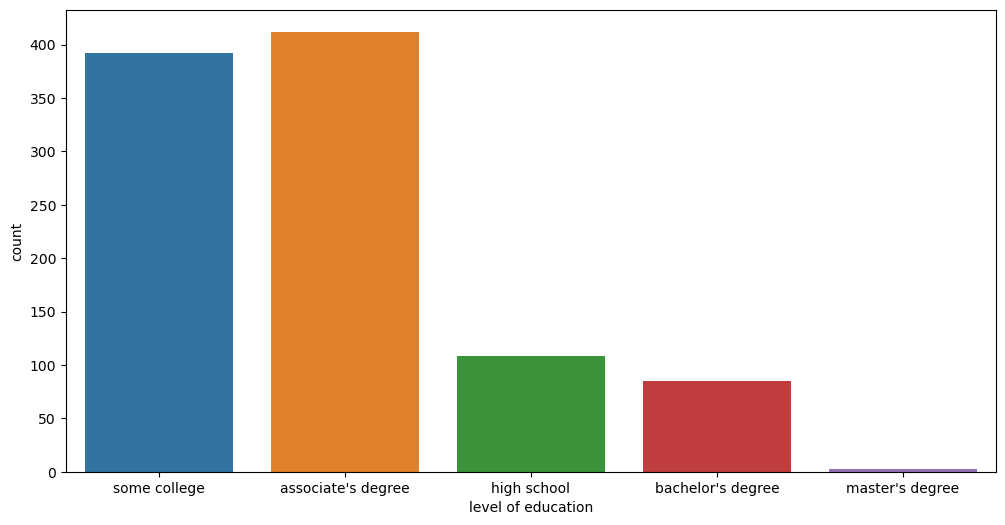

In [10]:

plt.figure(figsize=(12,6))

sns.countplot(data=df, x='level of education') #---> count plot for level of education category

In [11]:
# for actual count value 

df['level of education'].value_counts()  #---> returns the actual value count for each category in level of education

associate's degree    412
some college          392
high school           108
bachelor's degree      85
master's degree         3
Name: level of education, dtype: int64

--> we can see it only has 3 master degrees, hence it is hardly visible in countplot 

<Axes: xlabel='level of education', ylabel='count'>

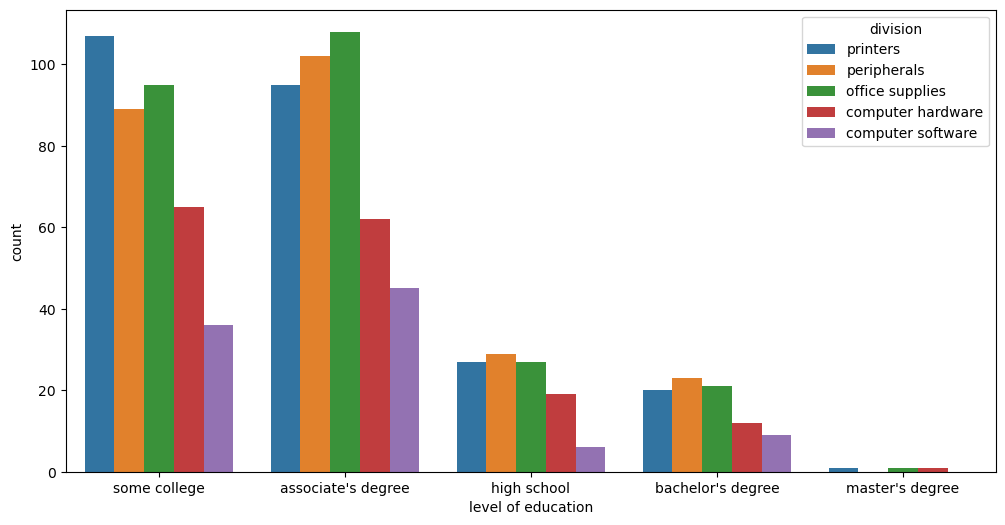

In [13]:
# params in countplot

plt.figure(figsize=(12, 6)) 
 
sns.countplot(data=df, x='level of education', hue='division') #--> passing in divison in hue param to further split this education level category

<Axes: xlabel='level of education', ylabel='count'>

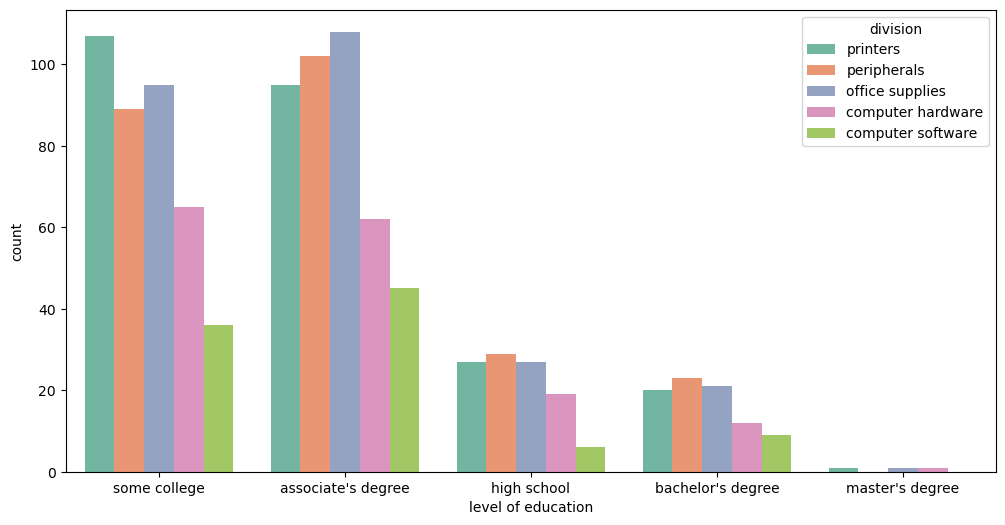

In [14]:
 # colormap in countplot ---> we can change color base of  matplot color map passing in pallte param( refer docs)
    
plt.figure(figsize=(12, 6))
 
sns.countplot(data=df, x='level of education', hue='division', palette='Set2') # passing in pallete as Set2 colormap


# NB --> for categorical plot we should pick from qualitative color mapping like Set2, dark2 etc


---> i.e we can play around with different colormapping (refer matplot doc )

NB - countplot is special case of general barplot since Y-axis is always going to be the count value, eg- no. of rows per cateory

------> i.e * barplot allows us to use any sort of metrics for the Y-axis & it can be any sort of function also


<Axes: xlabel='level of education', ylabel='salary'>

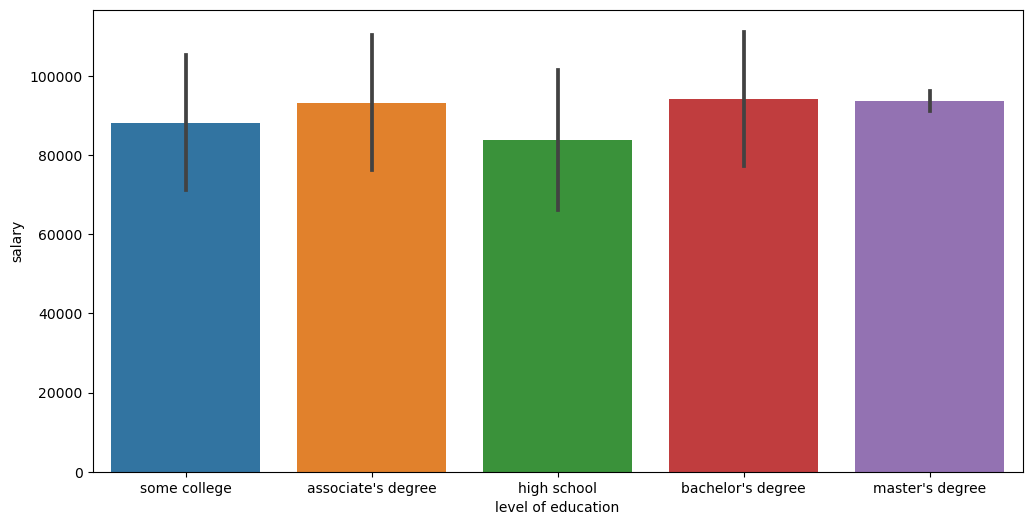

In [18]:
# barplots for categorical datas

plt.figure(figsize=(12,6))

sns.barplot(data=df, x='level of education', y='salary', estimator=np.mean, errorbar='sd') # ----> barplots for education level category
                                                                #showing salary mean & standard deviation for each category


#--> we select y-axis to continous column dtpye (eg- salary), *BUT what e have to decide is what we are actually to show as 
  #as the aggragation method per group 
    
    #--> i.e base of category we'll aggragate it as same as by groupby -- i.e should we show mean,toatal no.salary to count etc
    
    #---> i.e we pass in estemator param for this where paa in single numpy fuction  we want eg- np.mean etc 
    
    #ci param --> size of confidence interval to draw around estimated values where we can also pass as sd for which ll draw 
                # sd as black line
    
    
    #NB -- > ci param is deprecated instead use 'errobar' param

In [19]:
# NB --> this barplots to show mean / standard deviation etc may not make sense to show this visually instead of table as
        # as it is a single value  info we can just show the table for it

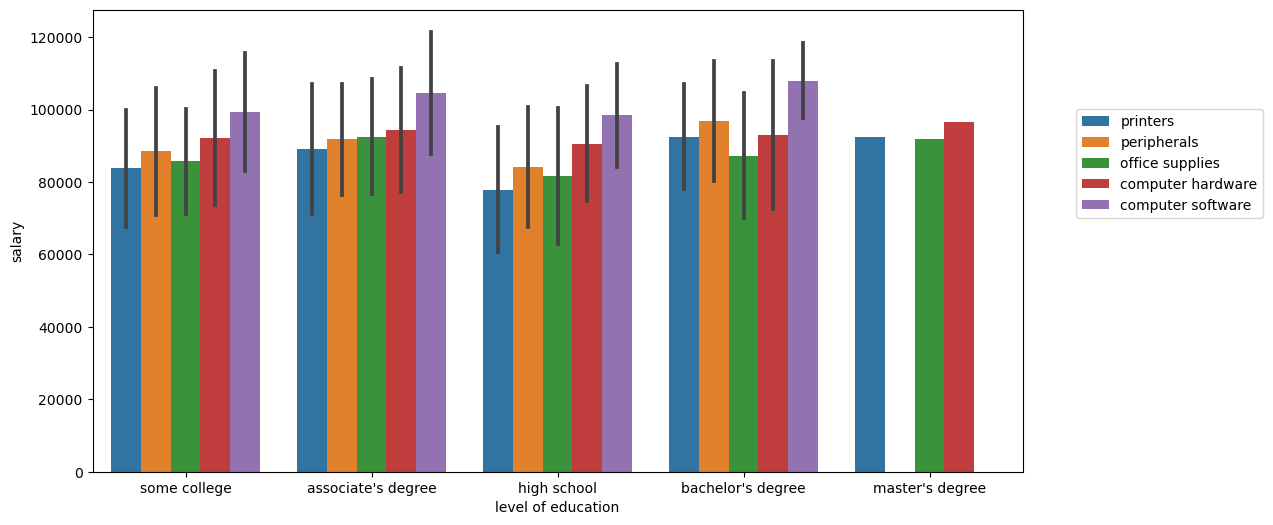

In [23]:
# hue param ---> further info within each category

plt.figure(figsize=(12,6))

sns.barplot(data=df, x='level of education', y='salary', estimator=np.mean, errorbar='sd',
           hue ='division') 

                                 #---> shows salary per level of education per division                        

plt.legend(bbox_to_anchor= (1.05, 0.8))  # ---> set legends outside of the plot

In [24]:
# this is it for this categorical plots for stats within catagories